In [1]:
from pyspark import SparkContext
sc= SparkContext("local","Week8")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/23 08:04:53 WARN Utils: Your hostname, dbl-07, resolves to a loopback address: 127.0.1.1; using 172.16.58.87 instead (on interface eno1)
25/10/23 08:04:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/23 08:04:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/23 08:19:17 WARN Utils: Your hostname, dbl-07, resolves to a loopback address: 127.0.1.1; using 172.16.58.87 instead (on interface eno1)
25/10/23 08:19:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/23 08:19:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df= spark.read.option('InferSchema',True).option('header',True).csv("AAPL.csv")
df.show()

+----------+------------------+
|      Date|         Adj Close|
+----------+------------------+
|2018-01-02|  40.3809814453125|
|2018-01-03| 40.37397003173828|
|2018-01-04|40.561492919921875|
|2018-01-05| 41.02330017089844|
|2018-01-08|40.870933532714844|
|2018-01-09| 40.86624526977539|
|2018-01-10| 40.85686111450195|
|2018-01-11| 41.08893585205078|
|2018-01-12| 41.51323318481445|
|2018-01-16| 41.30227279663086|
|2018-01-17|41.984432220458984|
|2018-01-18|42.021934509277344|
|2018-01-19| 41.83439254760742|
|2018-01-22| 41.49214553833008|
|2018-01-23| 41.50149917602539|
|2018-01-24|40.840457916259766|
|2018-01-25|40.111412048339844|
|2018-01-26|  40.2051887512207|
|2018-01-29| 39.37300109863281|
|2018-01-30| 39.14091873168945|
+----------+------------------+
only showing top 20 rows


In [6]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Adj Close: double (nullable = true)



In [5]:
df.orderBy('Date').show()

+----------+------------------+
|      Date|         Adj Close|
+----------+------------------+
|2018-01-02|  40.3809814453125|
|2018-01-03| 40.37397003173828|
|2018-01-04|40.561492919921875|
|2018-01-05| 41.02330017089844|
|2018-01-08|40.870933532714844|
|2018-01-09| 40.86624526977539|
|2018-01-10| 40.85686111450195|
|2018-01-11| 41.08893585205078|
|2018-01-12| 41.51323318481445|
|2018-01-16| 41.30227279663086|
|2018-01-17|41.984432220458984|
|2018-01-18|42.021934509277344|
|2018-01-19| 41.83439254760742|
|2018-01-22| 41.49214553833008|
|2018-01-23| 41.50149917602539|
|2018-01-24|40.840457916259766|
|2018-01-25|40.111412048339844|
|2018-01-26|  40.2051887512207|
|2018-01-29| 39.37300109863281|
|2018-01-30| 39.14091873168945|
+----------+------------------+
only showing top 20 rows


- log return calc

In [10]:
from pyspark.sql.functions import *

In [8]:
from pyspark.sql.window import Window

In [12]:
w= Window.orderBy(col('Date'))
df_ret= df.withColumn('log_ret', log(col('Adj Close')/lag(col('Adj Close')).over(w)))
df_ret= df_ret.dropna()

In [13]:
df_ret.show(5)

25/10/23 08:40:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:40:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:40:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:40:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:40:35 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+------------------+--------------------+
|      Date|         Adj Close|             log_ret|
+----------+------------------+--------------------+
|2018-01-03| 40.37397003173828|-1.73646654814172...|
|2018-01-04|40.561492919921875|0.004633895128314958|
|2018-01-05| 41.02330017089844|0.011321035840064001|
|2018-01-08|40.870933532714844|-0.00372106330574...|
|2018-01-09| 40.86624526977539|-1.14715555718508...|
+----------+------------------+--------------------+
only showing top 5 rows


In [14]:
row= df_ret.select(mean(col('log_ret')).alias('mean'),
                      stddev(col('log_ret')).alias('std_dev')).collect()[0]

25/10/23 08:45:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:45:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:45:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:45:49 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [18]:
mu= row[0]
sigma= row[1]

In [57]:
print(mu,sigma)

0.0009178316280219571 0.021106405470794374


#### monte carlo

In [26]:
import numpy as np
import math
from pyspark.sql.types import *

In [24]:
days= 252
s0= df_ret.select('Date', 'Adj Close').orderBy(col('Date').desc()).first()[1]

25/10/23 08:53:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:53:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:53:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:53:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/10/23 08:53:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [33]:
def monte_carlo(sim_id):
    dt= 1/252
    path= [s0]

    for _ in range(days):
        z= np.random.normal(0,1)
        drift= mu - 0.5*sigma*sigma
        diffusion= sigma* math.sqrt(dt) *z

        val= path[-1] * math.exp(drift+diffusion)
        path.append(val)
    
    #print(f"\nPath:{path}\n")
    return path

    

In [34]:
sim_df= udf(monte_carlo, ArrayType(DoubleType()))

sim_d= spark.range(0,5000).toDF('sim_id')

sim_d= sim_d.withColumn('sim_price_path', sim_df(col('sim_id')))
sim_d= sim_d.withColumn('final_price', element_at(col('sim_price_path'),-1))

In [35]:
sim_d.select('sim_id', 'final_price').show(5)

+------+------------------+
|sim_id|       final_price|
+------+------------------+
|     0| 149.6928674303865|
|     1|151.92353942055362|
|     2|157.86028923751178|
|     3|148.31466918931386|
|     4|    152.2950851395|
+------+------------------+
only showing top 5 rows


In [43]:
pd_df= sim_d.select('final_price').orderBy(col('final_price')).toPandas()

In [44]:
final_prices = pd_df['final_price'].values

p5 = np.percentile(final_prices, 5)

In [45]:
p5

np.float64(147.41098637840958)

In [47]:
final_prices

array([141.42876479, 141.5532293 , 141.60816537, ..., 163.41510063,
       163.91521633, 167.04620103], shape=(5000,))

In [48]:
var = s0 - p5
var

np.float64(-19.287939503409575)

In [54]:
import matplotlib.pyplot as plt

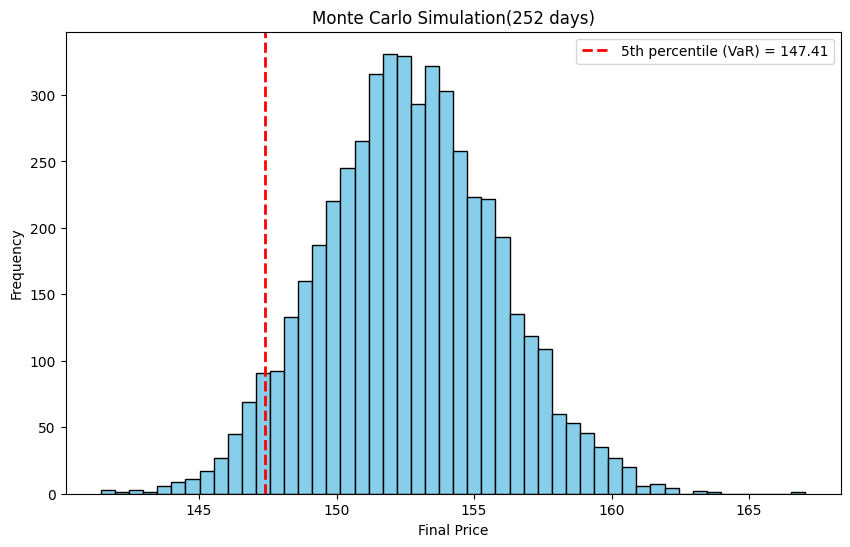

In [56]:
plt.figure(figsize=(10,6))
plt.hist(final_prices, bins=50, color='skyblue', edgecolor='black')
plt.axvline(p5, color='red', linestyle='dashed', linewidth=2, label=f'5th percentile (VaR) = {p5:.2f}')
plt.title("Monte Carlo Simulation(252 days)")
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
import numpy as np

# 1. Define the model for a *single* simulation run
def simulate_project_time():
    # 2. Use probability distributions to model uncertainty for each task
    time_task_A = np.random.uniform(3, 5)      # Uniform distribution: equally likely between 3 and 5 days
    time_task_B = np.random.normal(10, 2)      # Normal distribution: mean of 10 days, std dev of 2
    time_task_C = np.random.triangular(4, 5, 8) # Triangular: min=4, most likely=5, max=8

    # The outcome of one simulation is the sum of the task times
    total_time = time_task_A + time_task_B + time_task_C
    return total_time

# 3. Run the simulation many times
num_simulations = 10000
project_times = [simulate_project_time() for _ in range(num_simulations)]

# 4. Analyze the results
avg_completion_time = np.mean(project_times)
p95 = np.percentile(project_times, 95) # 95th percentile: "We are 95% confident the project will finish by this day"

print(f"Average Project Completion Time: {avg_completion_time:.2f} days")
print(f"95th Percentile Completion Time: {p95:.2f} days")

# Plot the results
plt.figure(figsize=(10,6))
plt.hist(project_times, bins=50, color='lightgreen', edgecolor='black')
plt.axvline(p95, color='blue', linestyle='dashed', linewidth=2, label=f'95th percentile = {p95:.2f} days')
plt.title("Project Completion Time Simulation")
plt.xlabel("Total Days to Complete")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Example: Adapting Monte Carlo for a Different Problem (Project Scheduling)

Here is an example of how you would define a different simulation function. Instead of modeling stock prices, this function simulates the total time to complete a project with three tasks, each with its own uncertainty. The rest of the framework (running it many times and analyzing the results) would be very similar.